In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/lazyflash99/ML-Tasks/refs/heads/main/Task%201/datasets/Dataset.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      649 non-null    object 
 1   sex         649 non-null    object 
 2   address     649 non-null    object 
 3   famsize     599 non-null    object 
 4   Pstatus     649 non-null    object 
 5   Medu        649 non-null    int64  
 6   Fedu        576 non-null    float64
 7   Mjob        649 non-null    object 
 8   Fjob        649 non-null    object 
 9   reason      649 non-null    object 
 10  guardian    649 non-null    object 
 11  traveltime  576 non-null    float64
 12  failures    649 non-null    int64  
 13  schoolsup   649 non-null    object 
 14  famsup      649 non-null    object 
 15  paid        649 non-null    object 
 16  activities  649 non-null    object 
 17  nursery     649 non-null    object 
 18  higher      573 non-null    object 
 19  internet    649 non-null    o

In [5]:
df.head()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3,romantic
0,GP,F,U,GT3,A,4,4.0,at_home,teacher,course,...,1,3,4.0,0,11.0,11,18.0,2.0,1.0,no
1,GP,F,U,GT3,T,1,1.0,at_home,other,course,...,1,3,2.0,9,11.0,11,17.0,2.0,1.0,no
2,GP,F,U,LE3,T,1,1.0,at_home,other,other,...,2,3,6.0,12,13.0,12,15.0,NaN,3.0,no
3,GP,F,U,GT3,T,4,2.0,health,services,home,...,1,5,0.0,14,14.0,14,15.0,3.0,1.0,yes
4,GP,F,U,GT3,T,3,3.0,other,other,home,...,1,5,0.0,11,13.0,13,16.0,NaN,2.0,no


In [6]:
df.isna().sum(axis = 0)

school         0
sex            0
address        0
famsize       50
Pstatus        0
Medu           0
Fedu          73
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime    73
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher        76
internet       0
famrel         0
freetime      45
goout          0
Dalc           0
health         0
absences      69
G1             0
G2            35
G3             0
Feature_1     38
Feature_2     46
Feature_3     39
romantic       0
dtype: int64

# Level 1

In [23]:
df.head()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3,romantic
0,GP,F,U,GT3,A,4,4.0,at_home,teacher,course,...,1,3,4.0,0,11.0,11,18.0,2.000000,1.0,no
1,GP,F,U,GT3,T,1,1.0,at_home,other,course,...,1,3,2.0,9,11.0,11,17.0,2.000000,1.0,no
2,GP,F,U,LE3,T,1,1.0,at_home,other,other,...,2,3,6.0,12,13.0,12,15.0,1.913765,3.0,no
3,GP,F,U,GT3,T,4,2.0,health,services,home,...,1,5,0.0,14,14.0,14,15.0,3.000000,1.0,yes
4,GP,F,U,GT3,T,3,3.0,other,other,home,...,1,5,0.0,11,13.0,13,16.0,1.913765,2.0,no


Text(0.5, 1.0, 'Column dependencies')

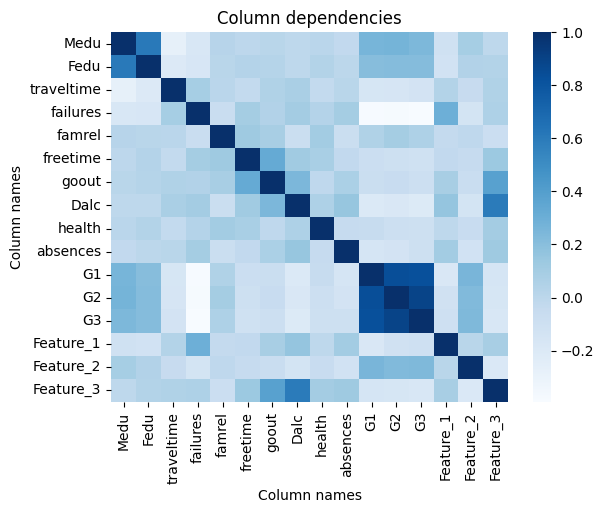

In [25]:
sns.heatmap(df.corr(numeric_only=True),cmap = "Blues")
plt.xlabel("Column names")
plt.ylabel("Column names")
plt.title("Column dependencies")

#### Clearly from the above graph we can conclude Feature_1 depends mainly on failures,Dalc,absences, Feature_2 on G1,G2,G3 and Feature_3 on goout,Dalc,health etc. which mainly points at the state of wellbeing of the individual.

In [22]:
df.groupby("Feature_1").Feature_1.count()

Feature_1
15.000000    103
16.000000    169
16.747954     38
17.000000    170
18.000000    130
19.000000     30
20.000000      6
21.000000      2
22.000000      1
Name: Feature_1, dtype: int64

#### Also value of Feature_1 varies from 15 to 22 with maximum around 16-17. So it can be concluded that Feature_1 is most probably Age as it fits all the clues discussed, like it has relation with failures,Dalc,absences.

In [28]:
df.groupby("Feature_2").Feature_2.count()

Feature_2
1.000000    204
1.913765     46
2.000000    279
3.000000     88
4.000000     32
Name: Feature_2, dtype: int64

In [29]:
df.groupby("Feature_3").Feature_3.count()

Feature_3
1.000000    239
2.000000    137
2.262295     39
3.000000    109
4.000000     85
5.000000     40
Name: Feature_3, dtype: int64

#### Feature_2 and Feature_3 seems like they are some kind of grade from 1-5 based on a question. Feature_3 maybe how would they rate their own mental and physical wellbeing on a scale of 1-5 and Feature_2 maybe about how they would rate their academic performance on a scale of 1-5.

# Level 2

### Categorical features are famsize and higher. So it makes sense to fill the na fields in them with the most frequent element of the respective features
### On the other hand for Numerical Features like Fedu, traveltime, freetime, absences, G2, Feature_1, Feature_2, Feature_3 the mean of the respective columns will be a better value to replace na fields.

In [7]:
cat_impute = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")
num_impute = SimpleImputer(missing_values = np.nan, strategy = "mean")

In [8]:
df.loc[:,["famsize","higher"]] = cat_impute.fit_transform(df.loc[:,["famsize","higher"]])

In [9]:
df.loc[:,["Fedu", "traveltime", "freetime", "absences", "G2", "Feature_1", "Feature_2", "Feature_3"]] = num_impute.fit_transform(df.loc[:,["Fedu", "traveltime", "freetime", "absences", "G2", "Feature_1", "Feature_2", "Feature_3"]])

In [10]:
df.isna().sum()

school        0
sex           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
famrel        0
freetime      0
goout         0
Dalc          0
health        0
absences      0
G1            0
G2            0
G3            0
Feature_1     0
Feature_2     0
Feature_3     0
romantic      0
dtype: int64

In [11]:
df.sample(5)

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3,romantic
646,MS,F,U,GT3,T,1,1.0,other,other,course,...,1,5,6.0,11,12.000000,9,18.0,1.913765,1.000000,no
186,GP,M,U,LE3,T,4,4.0,teacher,other,reputation,...,1,5,0.0,11,9.000000,10,17.0,2.000000,3.000000,no
7,GP,F,U,GT3,A,4,4.0,other,teacher,home,...,1,1,2.0,10,13.000000,13,17.0,2.000000,1.000000,no
130,GP,F,R,GT3,T,3,4.0,services,teacher,course,...,2,5,0.0,10,11.000000,12,15.0,3.000000,2.262295,yes
577,MS,M,R,GT3,T,1,1.0,other,services,home,...,3,2,8.0,10,11.586319,11,19.0,2.000000,3.000000,no


# Level 3

In [12]:
df.columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'famrel', 'freetime', 'goout', 'Dalc', 'health', 'absences',
       'G1', 'G2', 'G3', 'Feature_1', 'Feature_2', 'Feature_3', 'romantic'],
      dtype='object')

### Effect of address on schooling

In [13]:
df_address_school = df.loc[:,["address","school"]]

In [14]:
df_address_school.head()

,address,school
0,U,GP
1,U,GP
2,U,GP
3,U,GP
4,U,GP


# Level 4

In [223]:
df_mod = df.copy() 

In [224]:
df_mod.loc[df_mod["romantic"]=="yes","romantic"]= 1
df_mod.loc[df_mod["romantic"]=="no","romantic"]= 0

In [225]:
df_mod.romantic = pd.to_numeric(df_mod.romantic)

In [226]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      649 non-null    object 
 1   sex         649 non-null    object 
 2   address     649 non-null    object 
 3   famsize     649 non-null    object 
 4   Pstatus     649 non-null    object 
 5   Medu        649 non-null    int64  
 6   Fedu        649 non-null    float64
 7   Mjob        649 non-null    object 
 8   Fjob        649 non-null    object 
 9   reason      649 non-null    object 
 10  guardian    649 non-null    object 
 11  traveltime  649 non-null    float64
 12  failures    649 non-null    int64  
 13  schoolsup   649 non-null    object 
 14  famsup      649 non-null    object 
 15  paid        649 non-null    object 
 16  activities  649 non-null    object 
 17  nursery     649 non-null    object 
 18  higher      649 non-null    object 
 19  internet    649 non-null    o

In [229]:
df_part1 = df_mod.iloc[:,:-1]

In [232]:
df_modf = pd.get_dummies(df_part1)

In [233]:
df_modf["romantic"]=df_mod["romantic"]

In [286]:
df_modf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 58 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Medu               649 non-null    int64  
 1   Fedu               649 non-null    float64
 2   traveltime         649 non-null    float64
 3   failures           649 non-null    int64  
 4   famrel             649 non-null    int64  
 5   freetime           649 non-null    float64
 6   goout              649 non-null    int64  
 7   Dalc               649 non-null    int64  
 8   health             649 non-null    int64  
 9   absences           649 non-null    float64
 10  G1                 649 non-null    int64  
 11  G2                 649 non-null    float64
 12  G3                 649 non-null    int64  
 13  Feature_1          649 non-null    float64
 14  Feature_2          649 non-null    float64
 15  Feature_3          649 non-null    float64
 16  school_GP          649 non

In [287]:
X = df_modf.iloc[:,:-1]
y = df_modf.iloc[:,-1]

In [288]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.3,stratify=y)

In [289]:
regr = LogisticRegression(max_iter = 1000000)

In [290]:
regr.fit(X_train,y_train)

LogisticRegression(max_iter=1000000)

In [291]:
y_pred = regr.predict(X_test)

In [292]:
accuracy_score(y_test,y_pred)

0.5868131868131868

In [293]:
decisiontree = DecisionTreeClassifier()

In [294]:
decisiontree.fit(X_train,y_train)

DecisionTreeClassifier()

In [295]:
y_pred_dt = decisiontree.predict(X_test)

In [297]:
accuracy_score(y_test,y_pred_dt)

0.5538461538461539

In [298]:
rndmf = RandomForestClassifier()

In [299]:
rndmf.fit(X_train,y_train)

RandomForestClassifier()

In [301]:
y_pred_rndmf = rndmf.predict(X_test)

In [302]:
accuracy_score(y_test,y_pred_rndmf)

0.6153846153846154

### RandomTreeClassifier seems like a better option for this as it considers the effect of different permutations of the Features for prediction